In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_cv.layers import Equalization

2024-10-29 21:16:33.340239: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 21:16:33.374132: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 21:16:33.374174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 21:16:33.375308: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 21:16:33.381156: I tensorflow/core/platform/cpu_feature_guar

Using TensorFlow backend


/home/ssehg1@cfreg.local/.conda/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image1 = Image.open('COVID-19_Radiography_Dataset/masked_data/train/COVID/COVID-29.png').convert('RGB')
image2 = Image.open('COVID-19_Radiography_Dataset/research_data/train/COVID/COVID-29.png').convert('RGB')

image1 = image1.resize((224, 224))
image2 = image2.resize((224, 224))

img1_array = np.array(image1)
img2_array = np.array(image2)

result_array = np.multiply(img1_array, img2_array)

# Convert result back to an image
result_image = Image.fromarray(result_array)

# Save the result
result_image.save('./result_image2.jpg')

In [87]:
# def bcet(image_path):
#     image = Image.open(image_path).convert('L')
#     image = np.float32(image)
#     # Calculate min, max, and mean intensity values
#     min_intensity = np.min(image)
#     max_intensity = np.max(image)
#     mean_intensity = np.mean(image)
    
#     target_min, target_max, target_mean = 0, 255, 110
    
#     # Apply BCET formula
#     bcet_image = ((image - min_intensity) * ((target_mean - target_min) / (mean_intensity - min_intensity)) + 
#                  (image - max_intensity) * ((target_max - target_mean) / (max_intensity - mean_intensity)))
    
#     bcet_image = np.clip(bcet_image, target_min, target_max).astype(np.uint8)
#     result_image = Image.fromarray(bcet_image)
#     return result_image


import numpy as np
from PIL import Image

def bcet(image_path):
    # Load and convert the image to grayscale
    image = Image.open(image_path).convert('L')
    image = np.float32(image)  # Convert to float for accurate calculations

    # Calculate min, max, mean, and mean square sum of the intensity values
    Lmin = np.min(image)
    Lmax = np.max(image)
    Lmean = np.mean(image)
    LMssum = np.mean(image ** 2)  # Mean square sum of the input image

    # Desired output range and mean intensity
    Gmin, Gmax, Gmean = 0, 255, 128

    # Compute the 'b' coefficient for the BCET transformation
    bnum = (Lmax ** 2 * (Gmean - Gmin)) - (LMssum * (Gmax - Gmin)) + (Lmin ** 2 * (Gmax - Gmean))
    bden = 2 * (Lmax * (Gmean - Gmin) - Lmean * (Gmax - Gmin) + Lmin * (Gmax - Gmean))
    b = bnum / bden

    # Compute the 'a' and 'c' coefficients
    a = (Gmax - Gmin) / ((Lmax - Lmin) * (Lmax + Lmin - 2 * b))
    c = Gmin - a * (Lmin - b) ** 2

    # Apply the BCET parabolic transformation to each pixel in the image
    bcet_image = a * (image - b) ** 2 + c

    # Clip values to ensure they're within the valid range [0, 255]
    bcet_image = np.clip(bcet_image, Gmin, Gmax).astype(np.uint8)

    # Convert the result back to an image
    result_image = Image.fromarray(bcet_image)
    
    return result_image


In [85]:
def gamma_correction_pil(image_path, gamma):
    # Open the image
    image = Image.open(image_path).convert('L')
    
    # Convert to NumPy array
    img_array = np.array(image).astype(np.float32) / 255.0  # Normalize to 0-1 range

    # Perform gamma correction
    img_corrected = np.power(img_array, gamma)

    # Convert back to 0-255 range and uint8 type
    img_corrected = (img_corrected * 255).astype(np.uint8)

    # Convert back to an image and save
    result_image = Image.fromarray(img_corrected)
    return result_image
    # result_image.save(save_path)

def normalize(image_path):
    img = Image.open(image_path).convert('L').resize((224, 224))
    img = np.array(img).astype(np.float32)

    # img_mean = np.array([0.485, 0.456, 0.406])
    # img_std = np.array([0.229, 0.224, 0.225])

    img_mean = .485
    img_std = .229
    # print(img_mean, img_std)
    
    img = (img - img_mean) / img_std
    img_corrected = (img).astype(np.uint8)
    result_image = Image.fromarray(img_corrected)
    return result_image

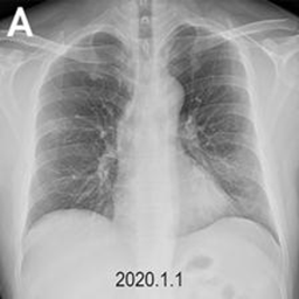

In [61]:
image_path = 'COVID-19_Radiography_Dataset/research_data/train/COVID/COVID-224.png'
image = Image.open(image_path).convert('L')
image

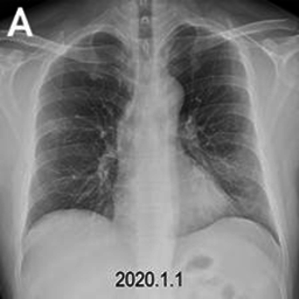

In [88]:
image_path = 'COVID-19_Radiography_Dataset/research_data/train/COVID/COVID-224.png'
img = bcet(image_path)
img

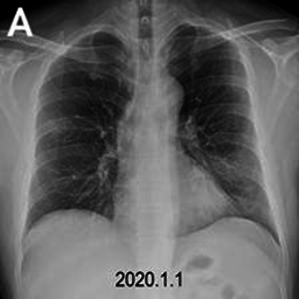

In [73]:
image_path = 'COVID-19_Radiography_Dataset/research_data/train/COVID/COVID-224.png'
img = gamma_correction_pil(image_path, 2.5)
img

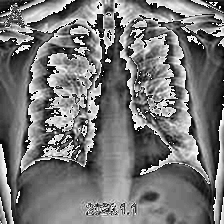

In [86]:
image_path = 'COVID-19_Radiography_Dataset/research_data/train/COVID/COVID-224.png'
img = normalize(image_path)
img


In [4]:
def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    return img

In [5]:
def show_images(images, titles):
    fig, axs = plt.subplots(1, len(images), figsize=(12, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
def histogram_equalization(img):
    return cv2.equalizeHist(img)

In [16]:
def clahe(img, clip_limit=3.0, tile_grid_size=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(img)

In [31]:
def image_complement(img):
    return 255 - img

In [27]:
normal_image_path = '/home/ssehg1@cfreg.local/covid_detection/COVID-19_Radiography_Dataset/Normal/images/Normal-16.png'
covid_image_path = '/home/ssehg1@cfreg.local/covid_detection/COVID-19_Radiography_Dataset/COVID/images/COVID-224.png'
original_normal = load_image(normal_image_path)
original_covid = load_image(covid_image_path)

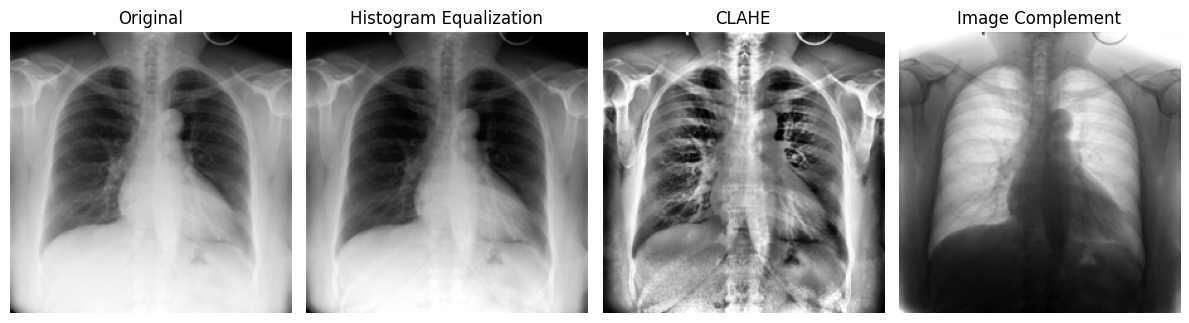

In [46]:
he_image_normal = histogram_equalization(original_normal)
clahe_image_normal = clahe(original_normal, clip_limit=20, tile_grid_size=(8,8))
complement_image_normal = image_complement(original_normal)
show_images([original_normal, he_image_normal, clahe_image_normal, complement_image_normal],
            ['Original', 'Histogram Equalization', 'CLAHE', 'Image Complement'])

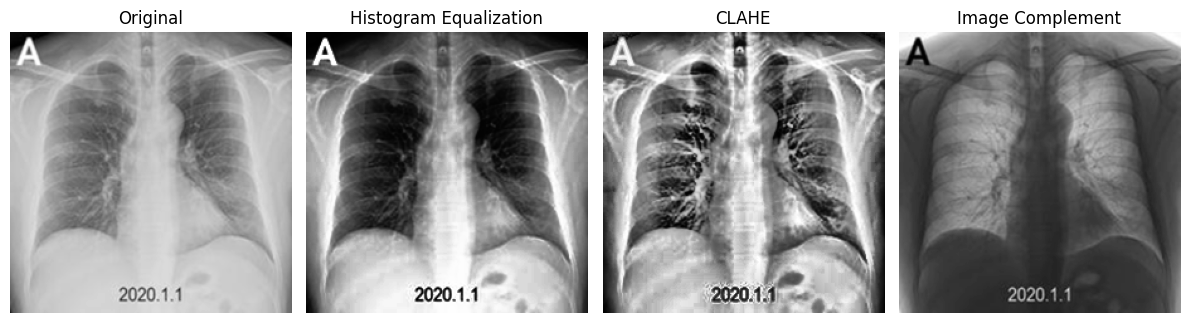

In [59]:
he_image_covid = histogram_equalization(original_covid)
clahe_image_covid = clahe(original_covid, clip_limit=10, tile_grid_size=(8,8))
complement_image_covid = image_complement(original_covid)
show_images([original_covid, he_image_covid, clahe_image_covid, complement_image_covid],
            ['Original', 'Histogram Equalization', 'CLAHE', 'Image Complement'])

In [8]:
normal_mask_path = '/home/ssehg1@cfreg.local/covid_detection/COVID-19_Radiography_Dataset/Normal/masks/Normal-123.png'
covid_mask_path = '/home/ssehg1@cfreg.local/covid_detection/COVID-19_Radiography_Dataset/COVID/masks/COVID-123.png'
mask_normal = load_image(normal_mask_path)
mask_covid = load_image(covid_mask_path)

In [9]:
combined_img_normal = np.multiply(original_normal, mask_normal)
combined_img_covid = np.multiply(original_covid, mask_covid)

Found 2 images belonging to 2 classes.


In [9]:
# covid_path = '/home/ssehg1@cfreg.local/covid_detection/COVID-19_Radiography_Dataset/research_data/xyz/COVID/COVID-520.png'
# normal_path = '/home/ssehg1@cfreg.local/covid_detection/COVID-19_Radiography_Dataset/research_data/xyz/normal/Normal-19.png'
# img1 = load_image(covid_path)
# img2 = load_image(normal_path)
# img1 = histogram_equalization(img1)
# img2 = histogram_equalization(img2)
# show_images([img1, img2], ['covid', 'normal'])

[ WARN:0@77.839] global loadsave.cpp:248 findDecoder imread_('/home/ssehg1@cfreg.local/covid_detection/COVID-19_Radiography_Dataset/research_data/xyz/COVID/COVID-520.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


(1, 224, 224, 3)


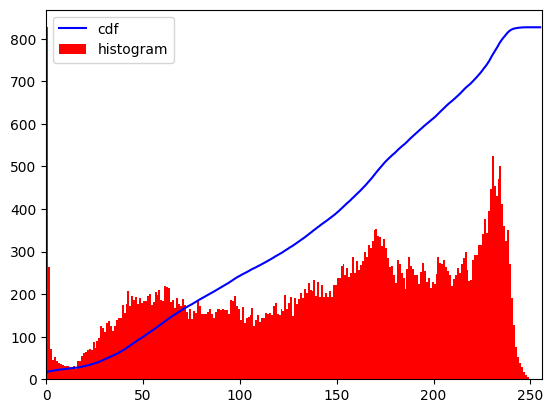

In [47]:
hist,bins = np.histogram(original_normal.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(original_normal.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

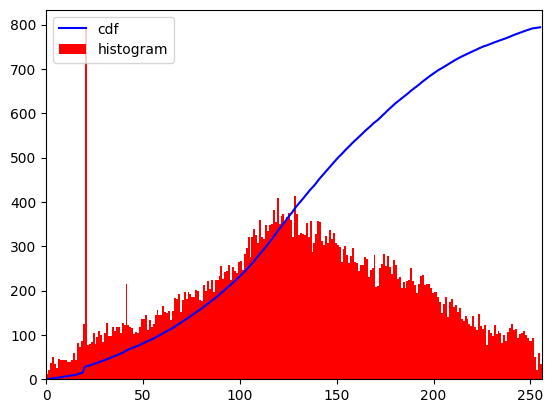

In [48]:
hist,bins = np.histogram(clahe_image_normal.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(clahe_image_normal.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_cv.layers import Equalization
equalize = Equalization((0, 255))

In [175]:
BASE_PATH = "/home/ssehg1@cfreg.local/covid_detection/COVID-19_Radiography_Dataset"
    
INPUT_SHAPE = 224
TRAINING_BATCH_SIZE = 1
VALIDATION_BATCH_SIZE = 32
TRAINING_DIR = BASE_PATH + "/research_data/train"
train_datagen = ImageDataGenerator(
                rescale = 1.0/255.,
                # rotation_range=40,
                # width_shift_range=0.25,
                # height_shift_range=0.25,
                # shear_range=0.3,
                # zoom_range=0.3,
                # horizontal_flip=True,
                # brightness_range=(0.2, 1.8),
                # fill_mode='nearest',
                # preprocessing_function=equalize
            )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size = TRAINING_BATCH_SIZE, 
                                                    target_size = (INPUT_SHAPE, INPUT_SHAPE), class_mode = "categorical", shuffle=False)

Found 960 images belonging to 2 classes.


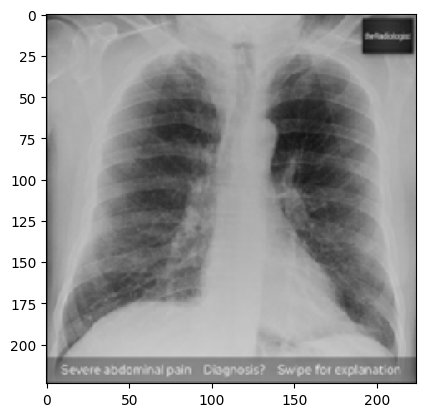

In [176]:
image = train_generator[1]
plt.imshow(image[0][0])
plt.show()

In [21]:
import os
images_path = '/home/ssehg1@cfreg.local/dataset/images_all/'
images = os.listdir(images_path)

In [42]:
img = load_image(images_path + images[0])
img = cv2.resize(img, (224, 224))
img_scaled = img/255.
img_mean = np.array([0.485, 0.456, 0.406])
img_std = np.array([0.229, 0.224, 0.225])
normalised_img = (img - img_mean) / img_std

ValueError: operands could not be broadcast together with shapes (224,224) (3,) 

In [39]:
# Normal Image
he_image_normal = histogram_equalization(img)
clahe_image_normal = clahe(img)
complement_image_normal = image_complement(img)

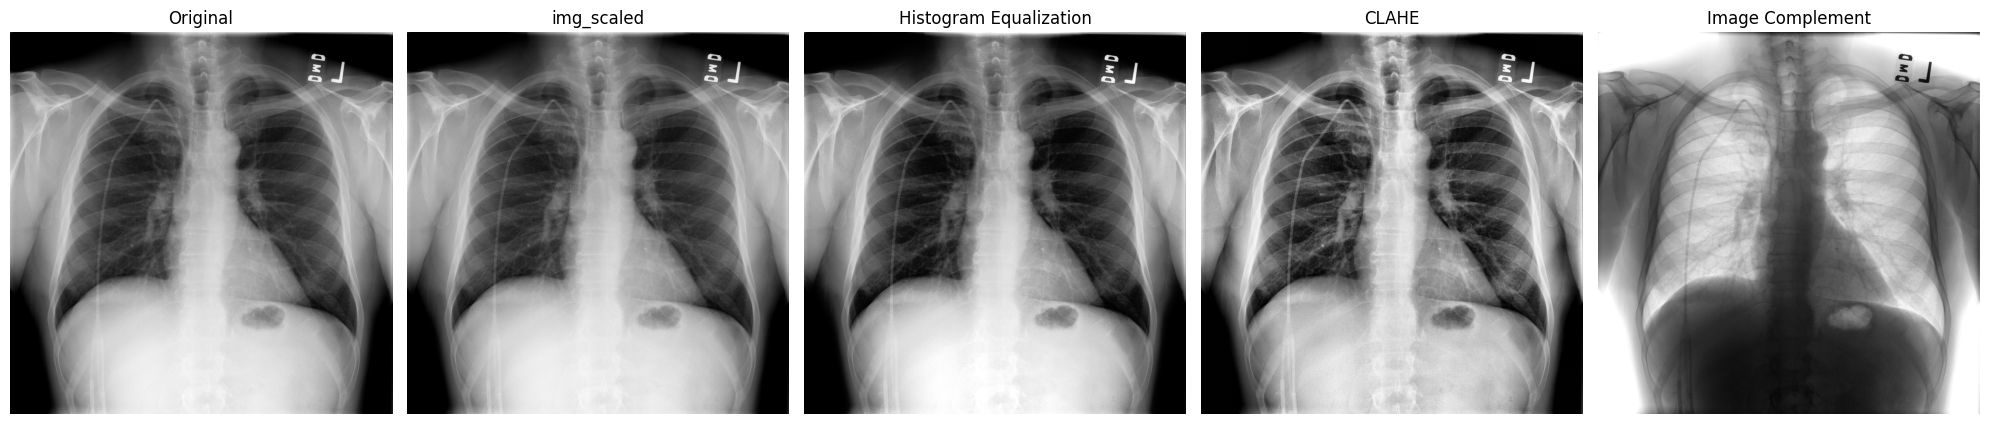

In [37]:
show_images([img, normalised_img, he_image_normal, clahe_image_normal, complement_image_normal],
            ['Original', 'img_scaled', 'Histogram Equalization', 'CLAHE', 'Image Complement'])

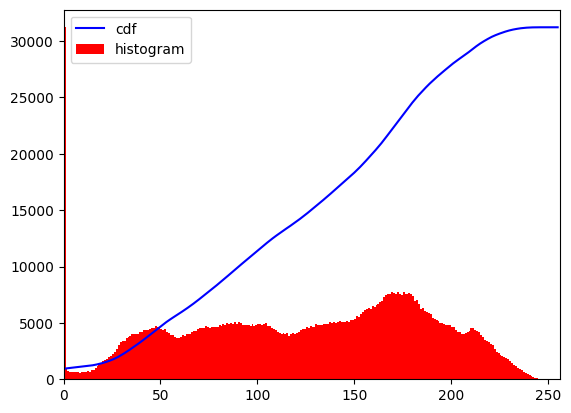

In [30]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

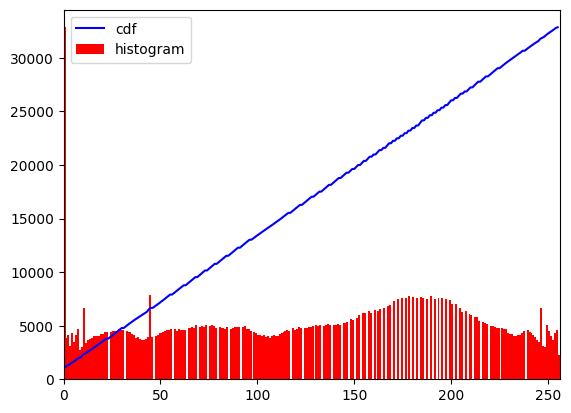

In [31]:
hist,bins = np.histogram(he_image_normal.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(he_image_normal.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

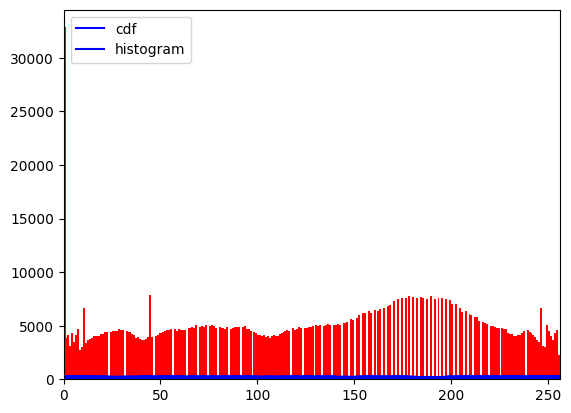

In [32]:
hist,bins = np.histogram(clahe_image_normal.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(clahe_image_normal, color = 'b')
plt.hist(he_image_normal.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()